In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import fitsio
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

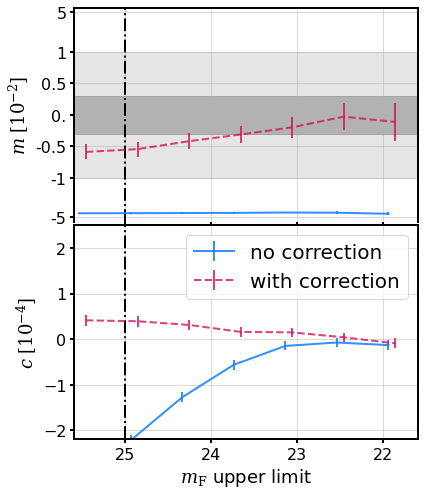

In [2]:
outs=fitsio.read('detect_magcut.fits')

ave=np.average(outs,axis=0)
std=np.std(outs,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[4,:]/0.04-1
y2=ave[1,:]/ave[5,:]/0.04-1
z1=ave[2,:]/ave[4,:]
z2=ave[3,:]/ave[5,:]
yerr=std[1,:]/ave[5,:]/0.04/np.sqrt(len(outs))
zerr=std[3,:]/ave[5,:]/np.sqrt(len(outs))

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit';
ax.errorbar(np.array(x)+0.04,np.array(y1)*1e2,np.array(yerr)*1e2,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.04,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')

ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_yscale('symlog',linthresh=1.)
ax.set_yticks([-5,-1,-0.5,0.,0.5,1,5])
ax.set_yticklabels(['-5','-1','-0.5','0.','0.5','1','5'])
ax.set_xlim(21.6,25.6)
ax.axvline(25.,color='black',ls='-.')

ax.set_ylim(-6,6.)
ax.invert_xaxis()
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.5)
ax.axhspan(-1.,1.,0,100,color='gray',alpha=0.2)


ax=axes[1]
ax.errorbar(np.array(x)+0.04,np.array(z1)*1e4,np.array(zerr)*1e4,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.04,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(21.6,25.6)
ax.axvline(25.,color='black',ls='-.')

ax.set_ylim(-2.2,2.5)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.grid()
ax.invert_xaxis()
plt.tight_layout(h_pad=-0.2)
fig.savefig('blend_magcut_try3.pdf')

In [3]:
y2

array([-0.00589092, -0.00545097, -0.00418696, -0.0031283 , -0.00198811,
       -0.00029979, -0.00113145])

In [5]:
yerr

array([0.0011827 , 0.00118263, 0.00118204, 0.0011851 , 0.00120509,
       0.00128094, 0.00140771, 0.00160521])

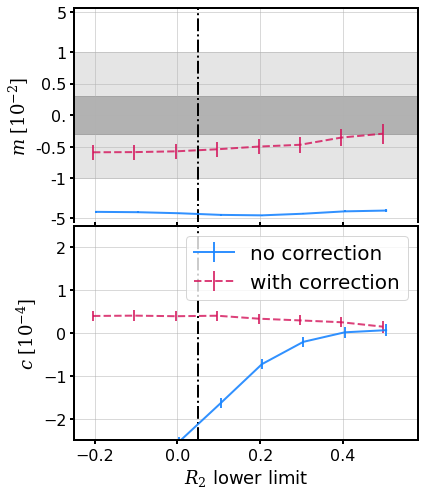

In [4]:
outs=fitsio.read('detect_r2cut.fits')

ave=np.average(outs,axis=0)
std=np.std(outs,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[4,:]/0.04-1
y2=ave[1,:]/ave[5,:]/0.04-1
z1=ave[2,:]/ave[4,:]
z2=ave[3,:]/ave[5,:]
yerr=std[1,:]/ave[5,:]/0.04/np.sqrt(len(outs))
zerr=std[3,:]/ave[5,:]/np.sqrt(len(outs))

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$R_{2}$ lower limit';
ax.errorbar(np.array(x)+0.004,np.array(y1)*1e2,np.array(yerr)*1e2,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_yscale('symlog',linthresh=1.)
ax.set_yticks([-5,-1,-0.5,0.,0.5,1,5])
ax.set_yticklabels(['-5','-1','-0.5','0.','0.5','1','5'])
ax.set_ylim(-6,6.)

ax.set_xlim(-0.25,0.58)
ax.axvline(0.05,color='black',ls='-.')
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.5)
ax.axhspan(-1.,1.,0,100,color='gray',alpha=0.2)

ax=axes[1]
ax.errorbar(np.array(x)+0.004,np.array(z1)*1e4,np.array(zerr)*1e4,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_ylim(-2.5,2.5)
ax.set_xlim(-0.25,0.58)
ax.axvline(0.05,color='black',ls='-.')

ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.grid()
plt.tight_layout(h_pad=-0.2)
fig.savefig('blend_r2cut_try3.pdf')

In [32]:
y2

array([-0.00592062, -0.00596021, -0.00576827, -0.00542255, -0.00476862,
       -0.00458631, -0.00359884, -0.00251703])

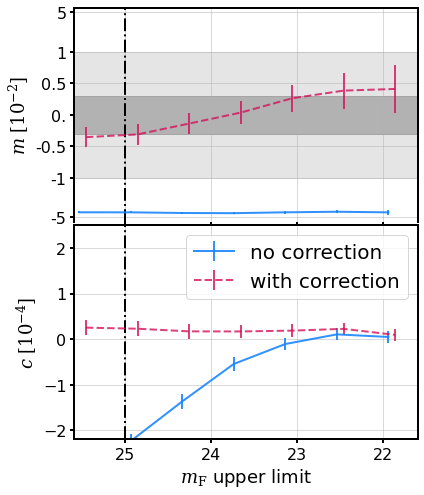

In [8]:
outs=fitsio.read('detect_magcut_2.fits')

ave=np.average(outs,axis=0)
std=np.std(outs,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[4,:]/0.04-1
y2=ave[1,:]/ave[5,:]/0.04-1
z1=ave[2,:]/ave[4,:]
z2=ave[3,:]/ave[5,:]
yerr=std[1,:]/ave[5,:]/0.04/np.sqrt(len(outs))
zerr=std[3,:]/ave[5,:]/np.sqrt(len(outs))

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit';
ax.errorbar(np.array(x)+0.04,np.array(y1)*1e2,np.array(yerr)*1e2,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.04,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_yscale('symlog',linthresh=1.)
ax.set_yticks([-5,-1,-0.5,0.,0.5,1,5])
ax.set_yticklabels(['-5','-1','-0.5','0.','0.5','1','5'])
ax.set_ylim(-6,6.)
ax.set_xlim(21.6,25.6)
ax.axvline(25.,color='black',ls='-.')

ax.invert_xaxis()
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.5)
ax.axhspan(-1.,1.,0,100,color='gray',alpha=0.2)


ax=axes[1]
ax.errorbar(np.array(x)+0.04,np.array(z1)*1e4,np.array(zerr)*1e4,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.04,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(21.6,25.6)
ax.axvline(25.,color='black',ls='-.')

ax.set_ylim(-2.2,2.5)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.grid()
ax.invert_xaxis()
plt.tight_layout(h_pad=-0.2)
fig.savefig('blend2_magcut_try3.pdf')

In [36]:
y2

array([-0.00354856, -0.003114  , -0.00139004,  0.0003486 ,  0.00262727,
        0.00384617,  0.00411082])

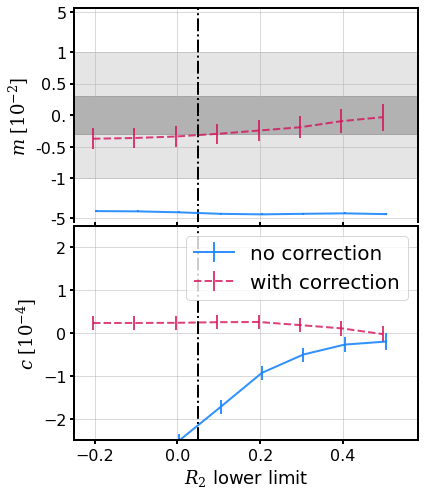

In [9]:
outs=fitsio.read('detect_r2cut_2.fits')

ave=np.average(outs,axis=0)
std=np.std(outs,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[4,:]/0.04-1
y2=ave[1,:]/ave[5,:]/0.04-1
z1=ave[2,:]/ave[4,:]
z2=ave[3,:]/ave[5,:]
yerr=std[1,:]/ave[5,:]/0.04/np.sqrt(len(outs))
zerr=std[3,:]/ave[5,:]/np.sqrt(len(outs))

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$R_{2}$ lower limit';
ax.errorbar(np.array(x)+0.004,np.array(y1)*1e2,np.array(yerr)*1e2,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_yscale('symlog',linthresh=1.)
ax.set_yticks([-5,-1,-0.5,0.,0.5,1,5])
ax.set_yticklabels(['-5','-1','-0.5','0.','0.5','1','5'])
ax.set_ylim(-6,6.)
ax.set_xlim(-0.25,0.58)
ax.axvline(0.05,color='black',ls='-.')
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.5)
ax.axhspan(-1.,1.,0,100,color='gray',alpha=0.2)

ax=axes[1]
ax.errorbar(np.array(x)+0.004,np.array(z1)*1e4,np.array(zerr)*1e4,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.25,0.58)
ax.axvline(0.05,color='black',ls='-.')
ax.set_ylim(-2.5,2.5)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
ax.grid()
plt.tight_layout(h_pad=-0.2)
fig.savefig('blend2_r2cut_try3.pdf')